# **NYPD Hate Crimes - EDA**
---
In this project, I have performed a through analysis on the provided `NYPD Crime Data`. I have also provided the link to various sources used as reference.

### **ABOUT DATASET**
This dataset has been sourced from [**here**](https://www.kaggle.com/datasets/manjitbaishya001/nypd-hate-crimes). It provides data of **Hate Crimes** conducted by people in **NYPD.**

### **IMPORTANT LINKS**
For a comprehensive details on the process, visit my [**`YouTube`**]()

# **Importing Libraries and Data**
---
Here, we will import all the required `libraries` for the project and all the `source files` necessary.

In [1]:
# importing required libraries
import numpy as np      # numerical operations
import pandas as pd     # dataframe handling
import seaborn as sns   # visualization
import matplotlib.pyplot as plt # visualization

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing source file
df = pd.read_csv("nypd_hate_crimes.csv")
df.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,202206012204617,2022,3,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,202006012153917,2020,2,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,202306012418117,2023,5,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,202306012285217,2023,4,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,202306012358417,2023,4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


This data need to be furthur `cleaned` and `processeed` before performing any analysis on it.

# **Data Cleaning**
---
In this section, we clean data of all `null values` with appropriate measures.

In [3]:
# looking at column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              2406 non-null   int64  
 1   Complaint Year Number          2406 non-null   int64  
 2   Month Number                   2406 non-null   int64  
 3   Record Create Date             2406 non-null   object 
 4   Complaint Precinct Code        2406 non-null   int64  
 5   Patrol Borough Name            2406 non-null   object 
 6   County                         2406 non-null   object 
 7   Law Code Category Description  2406 non-null   object 
 8   Offense Description            2406 non-null   object 
 9   PD Code Description            2406 non-null   object 
 10  Bias Motive Description        2406 non-null   object 
 11  Offense Category               2406 non-null   object 
 12  Arrest Date                    0 non-null      f

There are a total of `2406` rows and `13` columns.

**`NOTE:`** **Arrest Date** and **Arrest Id** are to be removed as they contain very less values.

# **Data Pre-Processing**
---

## **1. Selecting relevant columns only**
Here, we select only the required columns.

In [4]:
# looking at column names
df.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

In [5]:
# dropping columns
df = df[['Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name', 'County', 'Law Code Category Description', 'Offense Description',
       'Bias Motive Description', 'Offense Category']]

In [6]:
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice


## **2. Decoding Precincts**
Here, we will replace all `Precincts` codes with their actual addresses which has been taken from [**here**](https://www.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page).

In [7]:
# checking precincts
df['Complaint Precinct Code'].unique()

array([ 60,  61,  62,  63,  66,  67,  68,  70,  71,  72,  78,  73,  75,
        77,  79,  83,  84,  88,  90,  94,   1,   5,   6,   7,  10,  13,
        14,  17,  18,  19,  20,  22,  23,  24,  25,  26,  28,  30,  33,
        34, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
       114, 115,  40,  41,  43,  44,  45,  46,  47,  48,  50,  52, 120,
       121, 122, 123, 106,  81,   9,  32,  49,  76,  42,  69, 113],
      dtype=int64)

In [8]:
# create map
precinct_map = {
    1: "16 Ericsson Place",
    5: "19 Elizabeth Street",
    6: "233 West 10 Street",
    7: "19 1/2 Pitt Street",
    9: "321 East 5 Street",
    10: "230 West 20th Street",
    13: "230 East 21st Street",
    17: "167 East 51st Street",
    19: "153 East 67th Street",
    20: "120 West 82nd Street",
    23: "164 East 102nd Street",
    24: "151 West 100th Street",
    25: "120 East 119th Street",
    26: "520 West 126th Street",
    28: "2271-89 8th Avenue",
    30: "451 West 151st Street",
    32: "250 West 135th Street",
    33: "2207 Amsterdam Avenue",
    34: "4295 Broadway",
    40: "257 Alexander Avenue",
    41: "1035 Longwood Avenue",
    42: "830 Washington Avenue",
    43: "900 Fteley Avenue",
    44: "2 East 169th Street",
    45: "2877 Barkley Avenue",
    46: "2120 Ryer Avenue",
    47: "4111 Laconia Avenue",
    48: "450 Cross Bronx Expressway",
    49: "2121 Eastchester Road",
    50: "3450 Kingsbridge Avenue",
    52: "3016 Webster Avenue",
    60: "2951 West 8th Street",
    61: "2575 Coney Island Avenue",
    62: "1925 Bath Avenue",
    63: "1844 Brooklyn Avenue",
    66: "5822 16th Avenue",
    67: "2820 Snyder Avenue",
    68: "333 65th Street",
    69: "9720 Foster Avenue",
    70: "154 Lawrence Avenue",
    71: "421 Empire Boulevard",
    72: "830 4th Avenue",
    73: "1470 East New York Avenue",
    75: "1000 Sutter Avenue",
    76: "191 Union Street",
    77: "127 Utica Avenue",
    78: "65 6th Avenue",
    79: "263 Tompkins Avenue",
    81: "30 Ralph Avenue",
    83: "480 Knickerbocker Avenue",
    84: "301 Gold Street",
    88: "298 Classon Avenue",
    90: "211 Union Avenue",
    94: "100 Meserole Avenue",
    100: "92-24 Rockaway Beach Boulevard",
    101: "16-12 Mott Avenue",
    102: "87-34 118th Street",
    103: "168-02 P.O Edward Byrne Ave.",
    104: "64-2 Catalpa Avenue",
    105: "92-08 222nd Street",
    106: "103-53 101st Street",
    107: "71-01 Parsons Boulevard",
    108: "5-47 50th Avenue",
    109: "37-05 Union Street",
    110: "94-41 43rd Avenue",
    111: "45-06 215th Street",
    112: "68-40 Austin Street",
    113: "167-02 Baisley Boulevard",
    114: "34-16 Astoria Boulevard",
    115: "92-15 Northern Boulevard",
    120: "78 Richmond Terrace",
    121: "970 Richmond Avenue",
    122: "2320 Hylan Boulevard",
    123: "116 Main Street"
}

# mapping
df['Precinct Address'] = df['Complaint Precinct Code'].replace(precinct_map)

In [9]:
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category,Precinct Address
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street


In [10]:
# check if any missing
df['Precinct Address'].unique()

array(['2951 West 8th Street', '2575 Coney Island Avenue',
       '1925 Bath Avenue', '1844 Brooklyn Avenue', '5822 16th Avenue',
       '2820 Snyder Avenue', '333 65th Street', '154 Lawrence Avenue',
       '421 Empire Boulevard', '830 4th Avenue', '65 6th Avenue',
       '1470 East New York Avenue', '1000 Sutter Avenue',
       '127 Utica Avenue', '263 Tompkins Avenue',
       '480 Knickerbocker Avenue', '301 Gold Street',
       '298 Classon Avenue', '211 Union Avenue', '100 Meserole Avenue',
       '16 Ericsson Place', '19 Elizabeth Street', '233 West 10 Street',
       '19 1/2 Pitt Street', '230 West 20th Street',
       '230 East 21st Street', 14, '167 East 51st Street', 18,
       '153 East 67th Street', '120 West 82nd Street', 22,
       '164 East 102nd Street', '151 West 100th Street',
       '120 East 119th Street', '520 West 126th Street',
       '2271-89 8th Avenue', '451 West 151st Street',
       '2207 Amsterdam Avenue', '4295 Broadway',
       '92-24 Rockaway Beach Boule

## **3. Extracting date-time data**
We extract `Date`, `Month` and `Year` information from the provided date-time data. 

In [11]:
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category,Precinct Address
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street


In [12]:
# converting date to date-time format
df['record_date'] = pd.to_datetime(df['Record Create Date'], format='mixed')

# extract week of the day, date, month, and year into separate columns
df['date'] = df['record_date'].dt.day
df['day'] = df['record_date'].dt.strftime('%a')
df['month'] = df['record_date'].dt.strftime('%b')
df['year'] = df['record_date'].dt.year

In [13]:
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category,Precinct Address,record_date,date,day,month,year
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street,2022-03-07,7,Mon,Mar,2022
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street,2020-02-08,8,Sat,Feb,2020
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street,2023-05-23,23,Tue,May,2023
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street,2023-04-02,2,Sun,Apr,2023
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street,2023-05-01,1,Mon,May,2023


In [14]:
# ordering features list
df = df[['date', 'month', 'year', 'day', 'record_date', 'Patrol Borough Name', 'County', 'Law Code Category Description',
         'Bias Motive Description', 'Offense Category', 'Precinct Address']]

df.head()

,date,month,year,day,record_date,Patrol Borough Name,County,Law Code Category Description,Bias Motive Description,Offense Category,Precinct Address
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street


## **4. Renaming Columns**
We rename the columns to something simple

In [15]:
df.columns

Index(['date', 'month', 'year', 'day', 'record_date', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Bias Motive Description',
       'Offense Category', 'Precinct Address'],
      dtype='object')

In [16]:
df.columns = ['date', 'month', 'year', 'day', 'record_date', 'patrol', 'county', 'crime', 'motive', 'offense', 'pre_address']

In [17]:
df.head()

,date,month,year,day,record_date,patrol,county,crime,motive,offense,pre_address
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,2951 West 8th Street


## **5. Reconfiguring Data**
We make the data a little simpler to comprehend by renaming the column data as per the directions provided below.

In [18]:
patrol_mapping = {
    'PATROL BORO BKLYN NORTH': 'Brooklyn_N',
    'PATROL BORO BKLYN SOUTH': 'Brooklyn_S',
    'PATROL BORO MAN SOUTH': 'Man_S',
    'PATROL BORO MAN NORTH': 'Man_N',
    'PATROL BORO QUEENS SOUTH': 'Queens_S', 
    'PATROL BORO QUEENS NORTH': 'Queens_N',
    'PATROL BORO BRONX': 'Bronx', 
    'PATROL BORO STATEN ISLAND': 'Staten'
}

# Replace values using the dictionary
df['patrol'] = df['patrol'].replace(patrol_mapping)

offense_mapping = {
    'Religion/Religious Practice' : 'Religion', 
    'Race/Color' : 'Race',
    'Ethnicity/National Origin/Ancestry' : 'Origin', 
    'Gender' : 'Gender',
    'Sexual Orientation' : 'Orientation', 
    'Disability' : 'Diabled', 
    'Age' : 'Age'
}

# Replace values using the dictionary
df['offense'] = df['offense'].replace(offense_mapping)
df['motive'] = df['motive'].str.capitalize()
df['county'] = df['county'].str.capitalize()
df['crime'] = df['crime'].str.capitalize()

df.head()

,date,month,year,day,record_date,patrol,county,crime,motive,offense,pre_address
0,7,Mar,2022,Mon,2022-03-07,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,2951 West 8th Street
1,8,Feb,2020,Sat,2020-02-08,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,2951 West 8th Street
2,23,May,2023,Tue,2023-05-23,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,2951 West 8th Street
3,2,Apr,2023,Sun,2023-04-02,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,2951 West 8th Street
4,1,May,2023,Mon,2023-05-01,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,2951 West 8th Street


## **6. Sorting as per date**
Here, we sort our data as per the `record_date`.

In [19]:
df = df.sort_values(by='record_date').reset_index(drop=True)
df.drop('record_date', axis = 1, inplace = True)

df.head()

,date,month,year,day,patrol,county,crime,motive,offense,pre_address
0,1,Jan,2019,Tue,Brooklyn_S,Kings,Misdemeanor,Anti-jewish,Religion,421 Empire Boulevard
1,2,Jan,2019,Wed,Man_S,New york,Felony,Anti-arab,Origin,14
2,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,120 West 82nd Street
3,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,120 West 82nd Street
4,3,Jan,2019,Thu,Man_S,New york,Misdemeanor,Anti-male homosexual (gay),Orientation,19 Elizabeth Street


# **Exploratory Data Analysis(EDA)**
---

## **1. Yearly Trend**
Plotting the frequency of crime over the years using a `countplot`.

In [20]:
# checking at data
df['year'].value_counts()

year
2022    669
2021    577
2019    445
2023    429
2020    286
Name: count, dtype: int64

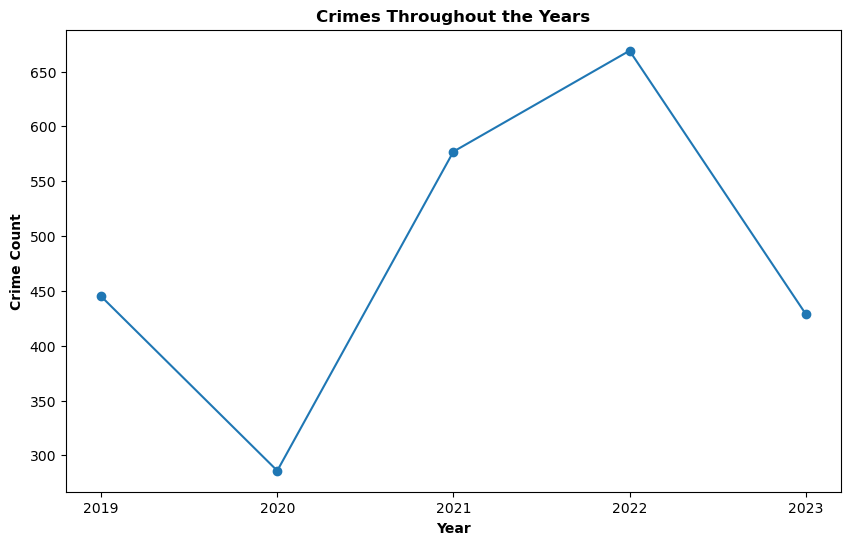

In [21]:
# counting the occurrences of each date
counts = df['year'].value_counts().sort_index()

# line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# title and y-axis label
plt.title('Crimes Throughout the Years', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Year', fontweight='bold')

# specifying x-axis labels
plt.xticks([2019, 2020, 2021, 2022, 2023])

# plot
plt.show()

`CONCLUSION`: The rate of crimes have seen a significant rise from `2019` to `2022` but has significantly decreased in `2023`.

## **2. Monthly Trend**
Plotting the frequency of crime over the `months` throughout the years using a `countplot`.

In [22]:
# checking count data
df['month'].value_counts()

month
Mar    274
May    266
Jun    244
Apr    216
Feb    209
Jul    204
Aug    195
Sep    191
Jan    169
Oct    165
Nov    141
Dec    132
Name: count, dtype: int64

Here, we will encounter jumbled order of months and so we need to fix it.

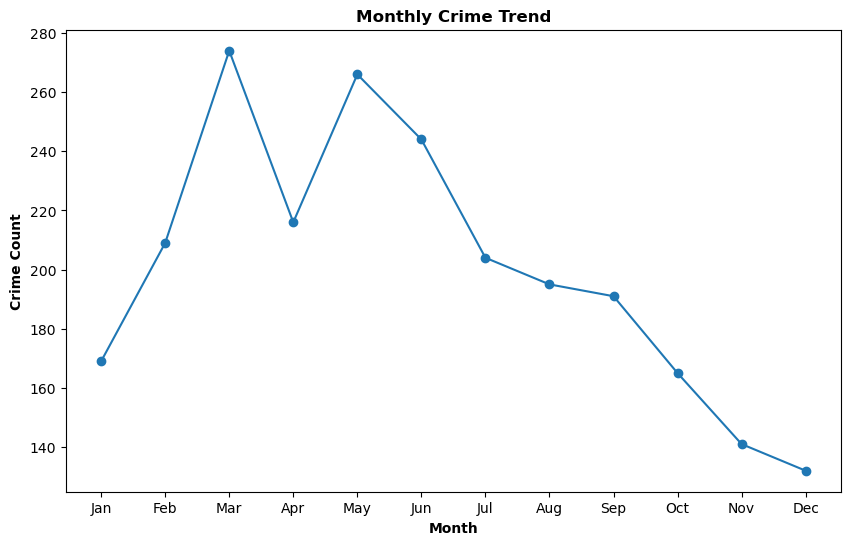

In [23]:
# defining the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# convert 'month' column to categorical with correct order
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered=True)

# count the occurrences of each month
counts = df['month'].value_counts().sort_index()

# plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# setting title and y-axis label
plt.title('Monthly Crime Trend', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

#  plotting
plt.show()

`CONCLUSION`: The crimes can be seen `increasing` through the `start` of the year to the `middle` and then gradually decreases.

## **4. Monthly trend per Year**
In order to dive a little deeper, we will analyse the `Monthly Trend` for each `individual` year.

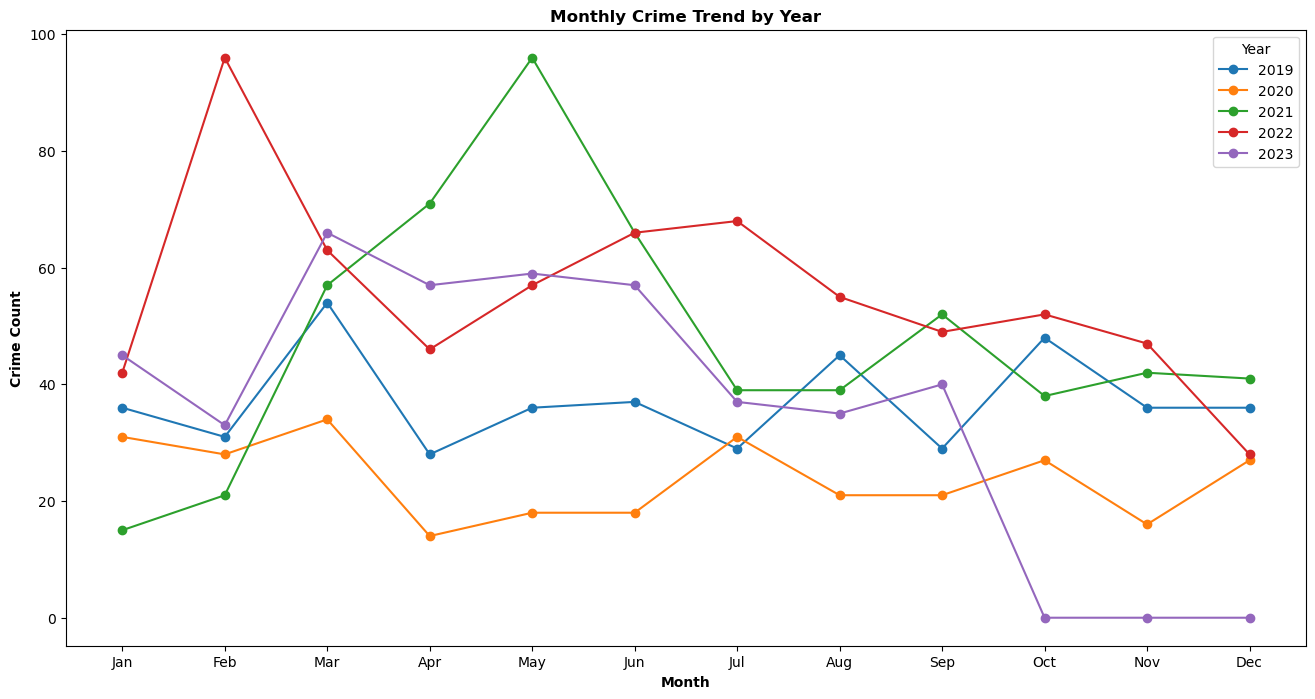

In [24]:
# defining correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# converting 'month' column to categorical with correct order
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered = True)

# counting the occurrences of each month
counts = df['month'].value_counts().sort_index()

# extracting unique years from the 'year' column
unique_years = df['year'].unique()

# plotting separate line plots for each year
plt.figure(figsize=(16, 8))
for year in unique_years:
    # data for the current year
    year_data = df[df['year'] == year]
    
    # counting the occurrences of each month for the current year
    year_month_counts = year_data['month'].value_counts().sort_index()
    
    # plotting the line plot for the current year
    plt.plot(year_month_counts.index, year_month_counts.values, marker='o', linestyle='-', label=str(year))

# title and axis labels
plt.title('Monthly Crime Trend by Year', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

# adding legend
plt.legend(title='Year')

# showing the plot
plt.show()


`CONCLUSION:` It can be seen that almost all of the years follow a similar pattern but `2021` and `2022` are a little different at the starting of the years respectively and then later saturate.

## **5. Weekly Trend**
Plotting the frequency of crime over the `weekdays` using a `countplot`.

In [25]:
# checking counts
df['day'].value_counts()

day
Tue    385
Thu    359
Fri    354
Mon    349
Sun    337
Wed    331
Sat    291
Name: count, dtype: int64

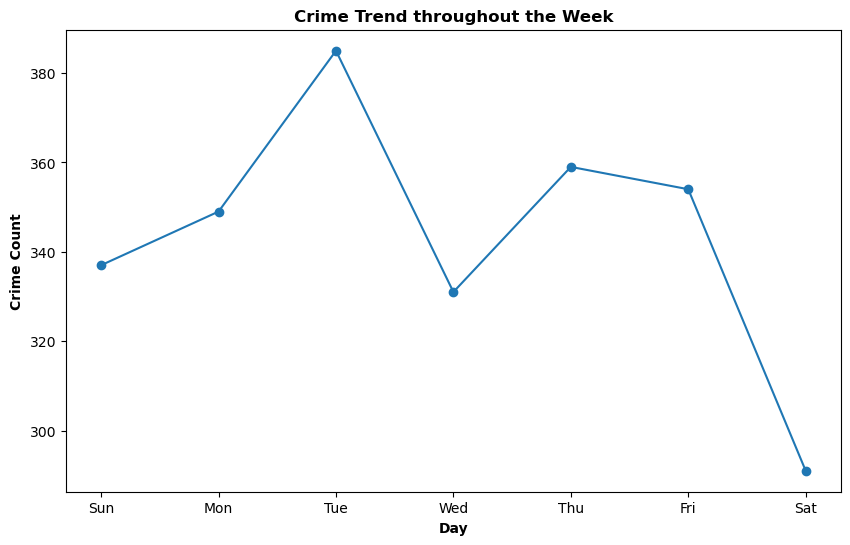

In [26]:
# define the correct order of weekdays
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# converting 'day' column to categorical with correct order
df['day'] = pd.Categorical(df['day'], categories = day_order, ordered=True)

# counting the occurrences of each day
counts = df['day'].value_counts().sort_index()

# plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# title and y-axis label
plt.title('Crime Trend throughout the Week', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Day', fontweight='bold')

# showing the plot
plt.show()

`CONCLUSION:` Crimes rise at the start of the week and fall over the end of the week.

## **6. Patrol Crime Counts**
Here, we plot the total number of crimes encountered and registerd by the respective patrols.

In [27]:
# checking counts
df['patrol'].value_counts()

patrol
Man_S         557
Brooklyn_S    445
Brooklyn_N    374
Man_N         320
Queens_N      287
Bronx         169
Queens_S      164
Staten         90
Name: count, dtype: int64

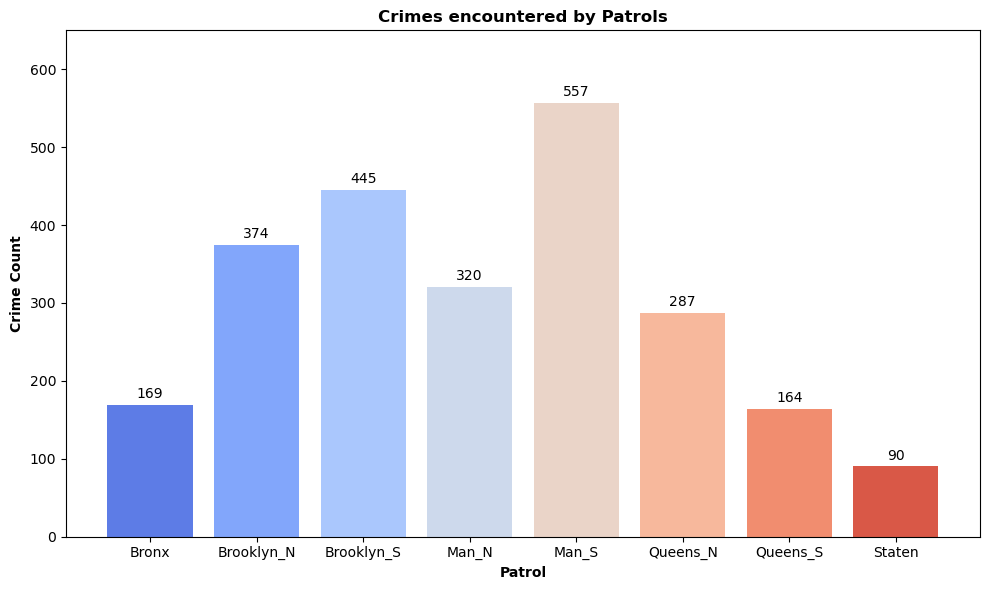

In [28]:
# counting Crime Counts as per patrol
counts = df['patrol'].value_counts().sort_index()

# getting the number of unique patrols
num_patrols = len(counts)

# setting seaborn colormap to 'coolwarm'
colors = sns.color_palette("coolwarm", num_patrols)

# bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color = colors)

# setting title and y-axis label
plt.title('Crimes encountered by Patrols', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Patrol', fontweight='bold')

# setting max limit on y-axis
plt.ylim(0, 650)

# adding annotations above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

# plotting
plt.tight_layout()
plt.show()


`CONSLUSION:` Hence, **Manhattan South Patrol** has the encountered the `highest` number of crimes whereas **Staten Island** has encountered the `lowest`.

## **7. Crimes throughout Counties**
We analyse crime distribution throughout the `counties`.

In [29]:
df['county'].value_counts()

county
New york    877
Kings       819
Queens      451
Bronx       169
Richmond     90
Name: count, dtype: int64

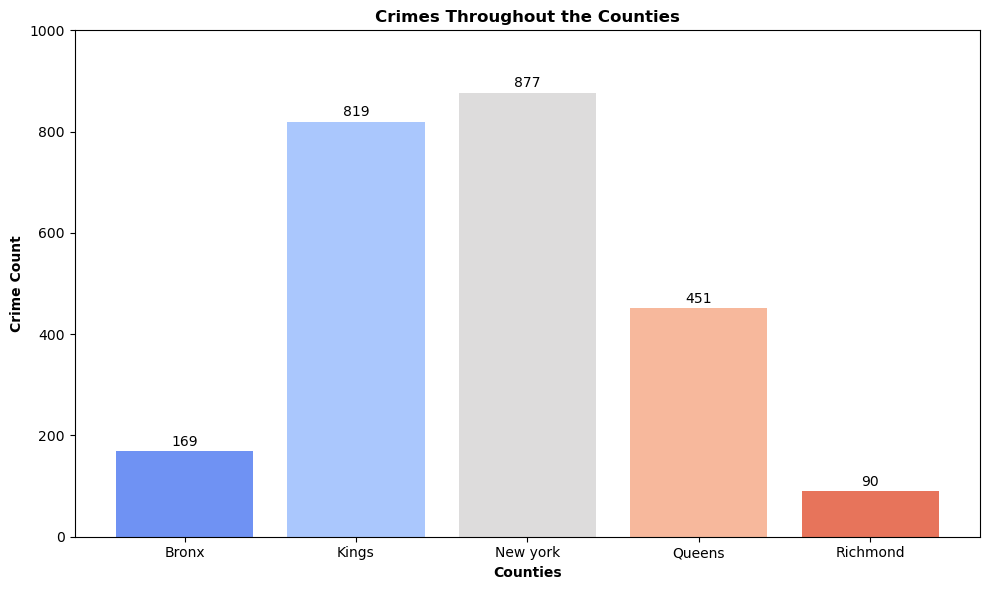

In [30]:
# counting Crime Counts as per counties
counts = df['county'].value_counts().sort_index()

# getting the number of unique counties
num_counties = len(counts)

# seaborn colormap to 'coolwarm'
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)
plt.title('Crimes Throughout the Counties', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Counties', fontweight = 'bold')

# setting max limit on y-axis
plt.ylim(0, 1000)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

# plot
plt.tight_layout()
plt.show()

`CONCLUSION:` `New York` and `Kings` counties have the highest number of crimes recorded.

## **8. Crime distribution by category**
We analyse crime distribution by `categories`.

In [31]:
df['crime'].value_counts()

crime
Misdemeanor      1232
Felony           1152
Violation          20
Investigation       2
Name: count, dtype: int64

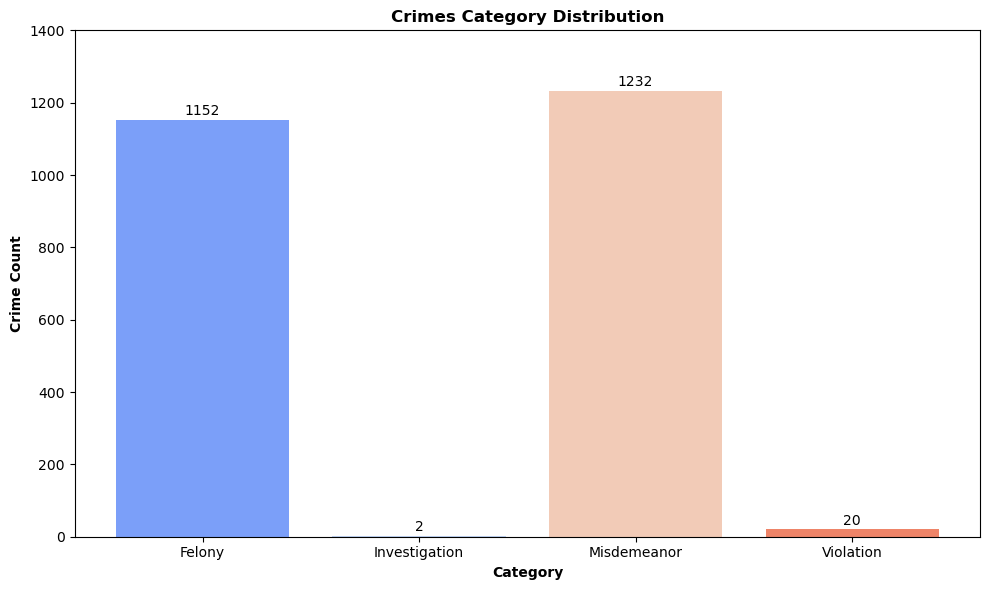

In [32]:
counts = df['crime'].value_counts().sort_index()
num_counties = len(counts)
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)

plt.title('Crimes Category Distribution', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Category', fontweight = 'bold')
plt.ylim(0, 1400)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`CONCLUSION:` The most common crimes are `Felony` and `Misdemeanor`.

## **9. Crime distribution by Motive**
Here, we see the distribution of crime as per the `motive`.

In [33]:
# checking data
df['motive'].value_counts()

motive
Anti-jewish                          1034
Anti-male homosexual (gay)            318
Anti-asian                            317
Anti-black                            211
Anti-white                             97
Anti-other ethnicity                   93
Anti-transgender                       63
Anti-muslim                            63
Anti-hispanic                          61
Anti-catholic                          44
Anti-female homosexual (lesbian)       33
Anti-female                            14
Anti-lgbt (mixed group)                11
Anti-gender non-conforming              8
Anti-arab                               7
Anti-hindu                              6
Anti-other religion                     5
Anti-sikh                               4
Anti-buddhist                           3
Anti-multi-racial groups                3
Anti-religious practice generally       3
Anti-jehovahs witness                   2
Anti-eastern orthodox                   2
Anti-protestant            

In [34]:
# picking top 7 motives
counts = df['motive'].value_counts()
counts.head(5)

motive
Anti-jewish                   1034
Anti-male homosexual (gay)     318
Anti-asian                     317
Anti-black                     211
Anti-white                      97
Name: count, dtype: int64

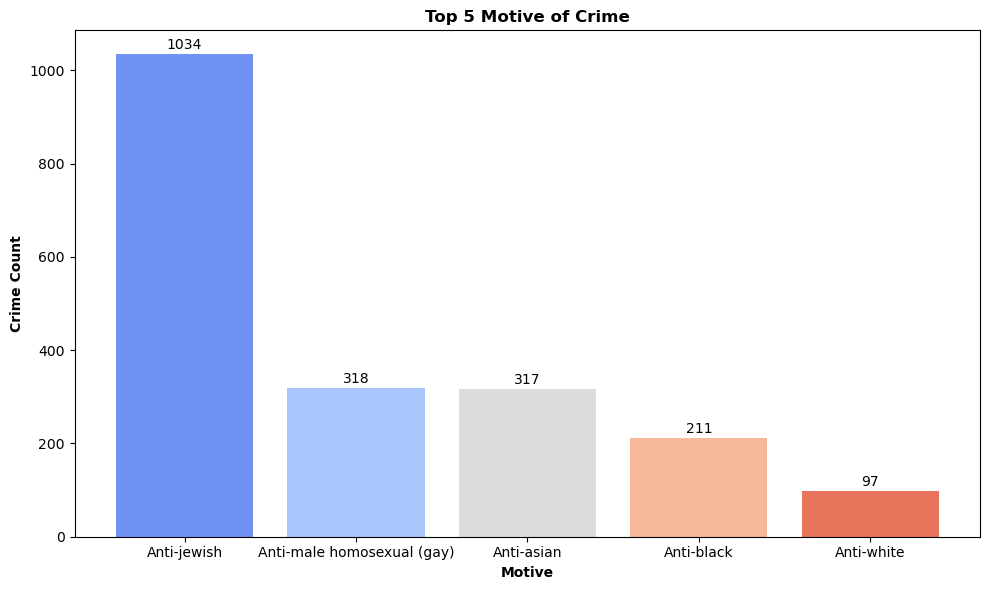

In [35]:
counts = df['motive'].value_counts()
top_5_counts = counts.head(5)

colors = sns.color_palette("coolwarm", len(top_5_counts))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_counts.index, top_5_counts.values, color=colors)

plt.title('Top 5 Motive of Crime', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Motive', fontweight = 'bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

`CONCLUSION:` `Anti-Jewish` is the most common motive of crime.

## **10. Crime distribution by Offense**
Here, we see the distribution of crime as per the `offense`.

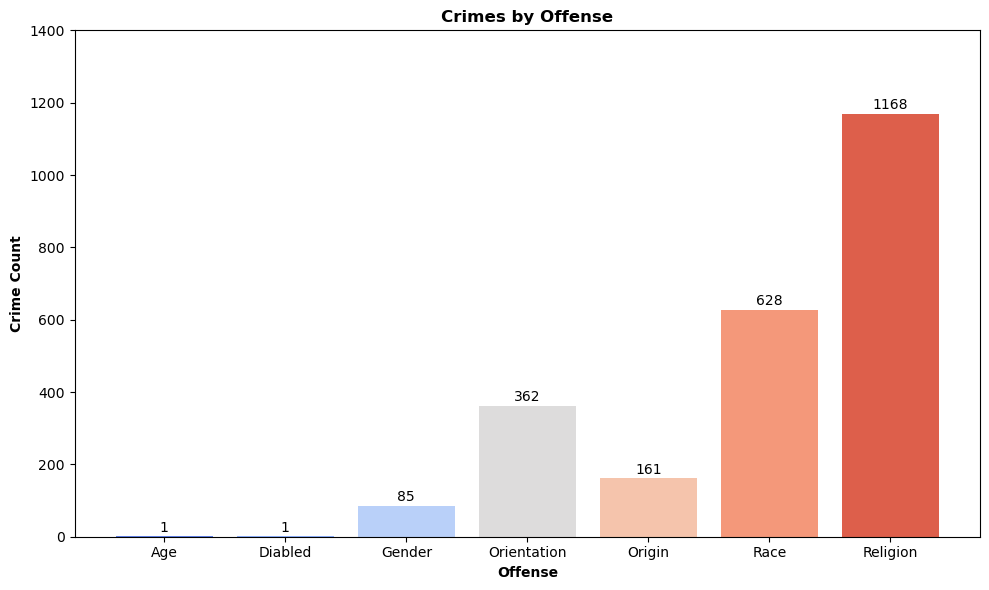

In [36]:
counts = df['offense'].value_counts().sort_index()
num_counties = len(counts)
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)

plt.title('Crimes by Offense', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Offense', fontweight = 'bold')
plt.ylim(0, 1400)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`CONCLUSION:` `Religion` is the most common offense of crime.